In [ ]:
json_data = [{"url_video": "https://www.youtube.com/watch?v=K21BSZPFIjQ&list=WL&index=1&pp=gAQBiAQB", "duracion_video": "", "titulo_video": "AMT2 - Extracting Emails from your Gmail Inbox using python", "nombre_canal": "DigitalSreeni"}, {"url_video": "https://www.youtube.com/watch?v=NQ6s4JFhGcc&list=WL&index=2&pp=gAQBiAQB", "duracion_video": "", "titulo_video": "Read emails with Python + Gmail API (part 1)", "nombre_canal": "ian samir"}, {"url_video": "https://www.youtube.com/watch?v=jvCenLHbDvY&list=WL&index=3&pp=gAQBiAQB", "duracion_video": "", "titulo_video": "Logra M\u00e1s Con Menos Esfuerzo - Esencialismo de Greg McKeown", "nombre_canal": "Mis Propias Finanzas"}, {"url_video": "https://www.youtube.com/watch?v=Ux9Cjjxhc8A&list=WL&index=4&pp=gAQBiAQB", "duracion_video": "", "titulo_video": "Estrat\u00e9gia de trading con ChatGPT 4 Code Interpreter", "nombre_canal": "Rodrigo Prieto"}, {"url_video": "https://www.youtube.com/watch?v=AONZoaWC9v4&list=WL&index=5&pp=gAQBiAQB", "duracion_video": "", "titulo_video": "AI & Machine Learning in Finance: AI Applications in the Financial Industry - Panel Discussion", "nombre_canal": "Swedish House of Finance"}, {"url_video": "https://www.youtube.com/watch?v=piVV-5RuX2o&list=WL&index=6&pp=gAQBiAQB", "duracion_video": "", "titulo_video": "DIY Thermal Camera using AMG8833 Thermal Image Array Temperature Sensor & Raspberry Pi", "nombre_canal": "How To Electronics"}] 

# Load Data

In [1]:
import pandas as pd 
from scraping_utils import read_json

In [2]:
data = read_json("data_videos\data_videos.json")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,url_video,duracion_video,titulo_video,nombre_canal
0,None,,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni
1,None,,Read emails with Python + Gmail API (part 1),ian samir
2,None,,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas
3,None,,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto
4,None,,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url_video       0 non-null      object
 1   duracion_video  3100 non-null   object
 2   titulo_video    3100 non-null   object
 3   nombre_canal    3097 non-null   object
dtypes: object(4)
memory usage: 97.0+ KB


In [6]:
df = df[['titulo_video','nombre_canal' ]]

In [ ]:
# df.groupby(by='nombre_canal').size().sort_values(ascending=False).head(20)

In [7]:
df.nombre_canal.value_counts() #.plot.scatter(x='nombre_canal', y='count')
df_per_canal = df.nombre_canal.value_counts()

In [8]:
df_per_canal = df_per_canal.to_frame().reset_index() 

In [9]:
df_per_canal.head(20)

,nombre_canal,count
0,Platzi,74
1,Ingenia UdeA,68
2,freeCodeCamp.org,56
3,Siraj Raval,38
4,MATLAB,27
5,Fazt Code,27
6,Exito Financiero,27
7,Roboticoss,21
8,Coding Tech,21
9,Zebendrums,21


<Axes: xlabel='nombre_canal', ylabel='count'>

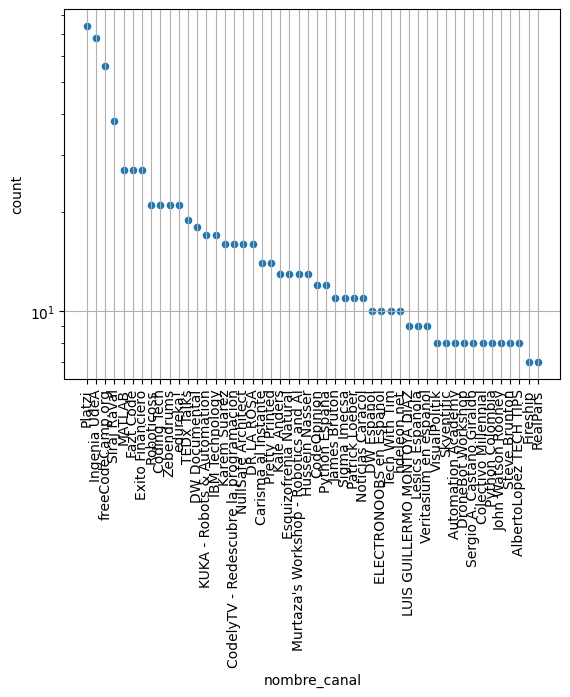

In [10]:
df_per_canal[:50].plot.scatter(x='nombre_canal',
                                 y='count',
                                 rot="vertical",
                                 grid= True,
                                 logy = True, 
                                #  x_compat=True
                                 )

<Axes: ylabel='count'>

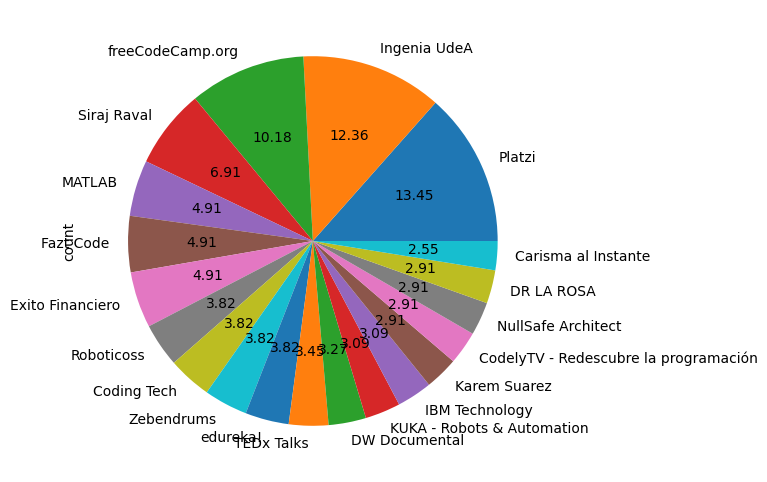

In [88]:
df_per_canal[:20].plot.pie(labels=df_per_canal[:20].nombre_canal, 
                           y='count',
                           fontsize=10,
                           autopct="%.2f",
                           legend = False, 
                           figsize=(6, 6))

In [26]:
df

,titulo_video,nombre_canal
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni
1,Read emails with Python + Gmail API (part 1),ian samir
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto
4,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance
...,...,...
3095,Cómo posicionar apps móviles en la Play Store ...,Platzi
3096,SERGIO FAJARDO EN CAFE PICANTE,Cafe Picante Morales
3097,debate entre Petro y Robledo sobre el mundo de...,Gustavo Petro
3098,"Al Punto con Gustavo Petro, candidato presiden...",Canal REDMÁSTV


# Seccion nltk 

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_words_es = set(stopwords.words('spanish')) 
stop_words_en = set(stopwords.words('english'))

stop_words = stop_words_es | stop_words_en | set("cómo")

In [18]:
lngs = []
# Procesamiento de texto
def process_text(text):
    global lngs
    lng = None 
    words = word_tokenize(text.lower())
    # Determinar el idioma del título basado en las stopwords restantes
    if any(token in stop_words_es for token in words):
        lng=  "es"
    elif any(token in stop_words_en for token in words):
        lng = "en"
    lngs.append(lng)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words 


# Agregar columna de palabras clave a DataFrame
df['keywords'] = df['titulo_video'].apply(process_text)
df['lgns'] = lngs
df

,titulo_video,nombre_canal,keywords,lgns
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"[amt2, extracting, emails, gmail, inbox, using...",en
1,Read emails with Python + Gmail API (part 1),ian samir,"[read, emails, python, gmail, api, part, 1]",en
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"[logra, menos, esfuerzo, esencialismo, greg, m...",es
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto,"[estratégia, trading, chatgpt, 4, code, interp...",es
4,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance,"[ai, machine, learning, finance, ai, applicati...",en
...,...,...,...,...
3095,Cómo posicionar apps móviles en la Play Store ...,Platzi,"[cómo, posicionar, apps, móviles, play, store,...",es
3096,SERGIO FAJARDO EN CAFE PICANTE,Cafe Picante Morales,"[sergio, fajardo, cafe, picante]",es
3097,debate entre Petro y Robledo sobre el mundo de...,Gustavo Petro,"[debate, petro, robledo, mundo, trabajo]",es
3098,"Al Punto con Gustavo Petro, candidato presiden...",Canal REDMÁSTV,"[punto, gustavo, petro, candidato, presidencial]",es


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titulo_video  3100 non-null   object
 1   nombre_canal  3097 non-null   object
 2   keywords      3100 non-null   object
 3   lgns          2678 non-null   object
 4   bigrams       3100 non-null   object
dtypes: object(5)
memory usage: 121.2+ KB


In [19]:
df["bigrams"]= [list(nltk.bigrams(x)) for x in df.keywords] # list(nltk.bigrams(df.keywords))
# list(nltk.bigrams(df.keywords))
df

,titulo_video,nombre_canal,keywords,lgns,bigrams
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"[amt2, extracting, emails, gmail, inbox, using...",en,"[(amt2, extracting), (extracting, emails), (em..."
1,Read emails with Python + Gmail API (part 1),ian samir,"[read, emails, python, gmail, api, part, 1]",en,"[(read, emails), (emails, python), (python, gm..."
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"[logra, menos, esfuerzo, esencialismo, greg, m...",es,"[(logra, menos), (menos, esfuerzo), (esfuerzo,..."
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto,"[estratégia, trading, chatgpt, 4, code, interp...",es,"[(estratégia, trading), (trading, chatgpt), (c..."
4,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance,"[ai, machine, learning, finance, ai, applicati...",en,"[(ai, machine), (machine, learning), (learning..."
...,...,...,...,...,...
3095,Cómo posicionar apps móviles en la Play Store ...,Platzi,"[cómo, posicionar, apps, móviles, play, store,...",es,"[(cómo, posicionar), (posicionar, apps), (apps..."
3096,SERGIO FAJARDO EN CAFE PICANTE,Cafe Picante Morales,"[sergio, fajardo, cafe, picante]",es,"[(sergio, fajardo), (fajardo, cafe), (cafe, pi..."
3097,debate entre Petro y Robledo sobre el mundo de...,Gustavo Petro,"[debate, petro, robledo, mundo, trabajo]",es,"[(debate, petro), (petro, robledo), (robledo, ..."
3098,"Al Punto con Gustavo Petro, candidato presiden...",Canal REDMÁSTV,"[punto, gustavo, petro, candidato, presidencial]",es,"[(punto, gustavo), (gustavo, petro), (petro, c..."


In [20]:
from scraping_utils import flatten_list

md_bigrams = flatten_list(df.bigrams)
fdist = nltk.FreqDist(md_bigrams)

In [21]:
fdist.most_common(20)

[(('machine', 'learning'), 48),
 (('raspberry', 'pi'), 45),
 (('full', 'course'), 41),
 (('delta', 'robot'), 32),
 (('data', 'science'), 31),
 (('computer', 'vision'), 28),
 (('deep', 'learning'), 24),
 (('part', '1'), 23),
 (('object', 'detection'), 22),
 (('inteligencia', 'artificial'), 20),
 (('opencv', 'python'), 20),
 (('clean', 'architecture'), 19),
 (('dw', 'documental'), 19),
 (('using', 'python'), 14),
 (('web', 'scraping'), 14),
 (('crash', 'course'), 14),
 (('rest', 'api'), 14),
 (('tutorial', 'beginners'), 13),
 (('paso', 'paso'), 13),
 (('system', 'design'), 12)]

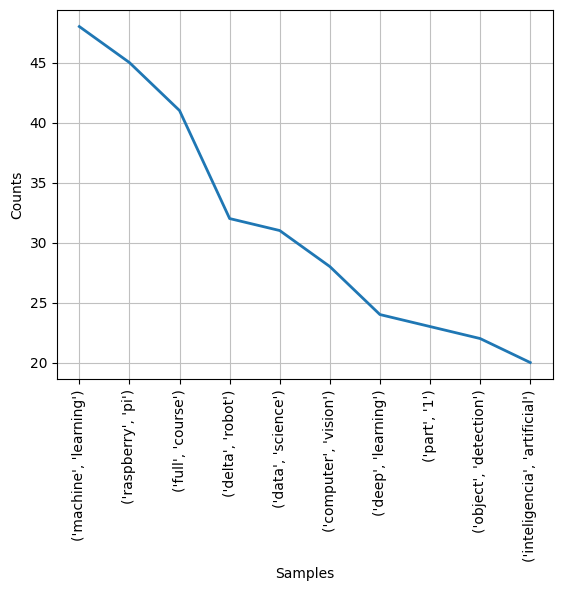

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
fdist.plot(10)

## filtrado 1

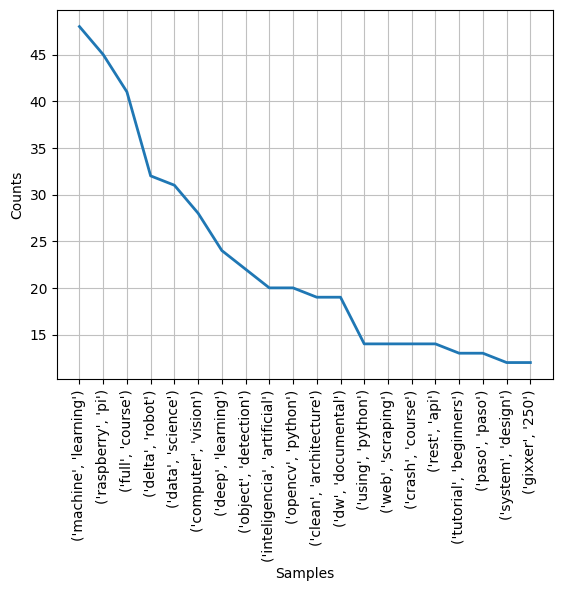

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
threshold = 1
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = nltk.FreqDist(filtered_bigrams)
filtered_dist.plot(20)

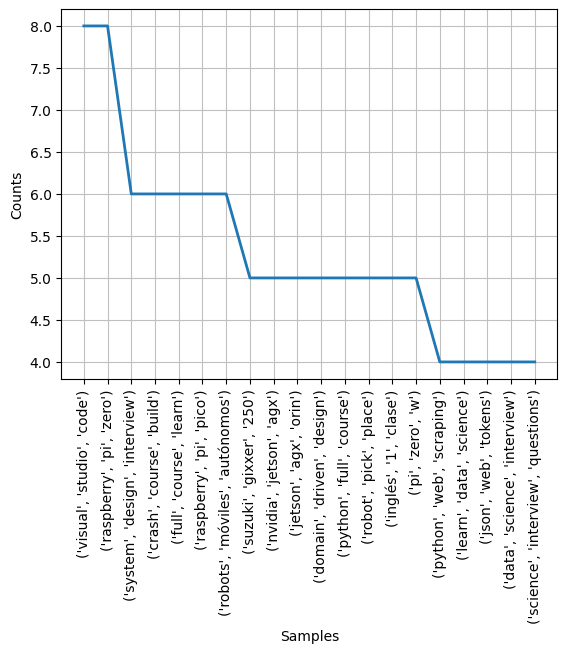

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
from nltk.util import ngrams
df["trigrams"]= [list(ngrams(x, 3)) for x in df.keywords] 
md_trigrams = flatten_list(df.trigrams)
fdist = nltk.FreqDist(md_trigrams)
fdist.plot(20)

import nltk
nltk.download(‘omw’)
nltk.download(‘wordnet’)
nltk.download(‘omw-1.4’)
from nltk.corpus import wordnet as wn

# bettering tokens with nltk
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][;"'?():-_`]      # Hace match con signos de puntuación
'''
tokens2 = nltk.regexp_tokenize(raw, pattern)
print(tokens2[:50]) 

In [104]:
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS

In [117]:
# Combinar todas las palabras en una sola cadena
all_keywords = df['keywords'].to_list()
all_keywords = [item for sublist in all_keywords for item in sublist if item !="cómo"]
all_keywords = ' '.join(all_keywords)
all_keywords

'amt2 extracting emails gmail inbox using python read emails python gmail api part 1 logra menos esfuerzo esencialismo greg mckeown estratégia trading chatgpt 4 code interpreter ai machine learning finance ai applications financial industry panel discussion diy thermal camera using amg8833 thermal image array temperature sensor raspberry pi alain botton educación emocional react ecosystem 2023 potenciar eficiencia procesos ingeniería fases diseño fabricación webinar edificios energía casi nula reto eficiencia energética españa webinar eficiencia energética edificios 7 octubre 2015 votimum webinar completo integración programación proyectos smart home tiempo récord webinar completo energía fotovoltaica autoconsumo ventiladores rejillas teknopowers finder altech medidores humedad igm marca flir webinar sistema comunicación marca autonics webinar selección aplicaciones plc hmi conexiones entradas salidas medidor humedad imágenes termográficas teledyne flir mr160 9 free notion templates 10

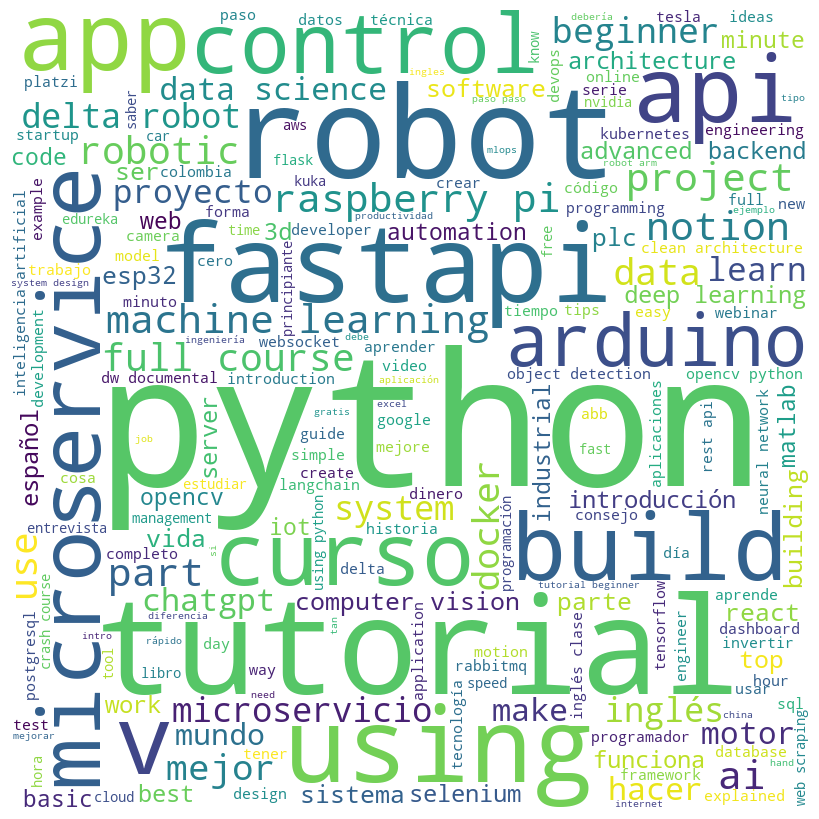

In [118]:
# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10,
                      colormap='viridis').generate(all_keywords)

# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [124]:
# Implementar algoritmo de agrupación (por ejemplo, K-Means)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [125]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['titulo_video'])
num_clusters = 10  # Número de clusters (temáticas)
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

# Agregar columna de cluster al DataFrame
df['cluster'] = kmeans.labels_

c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [130]:
df.cluster.value_counts()#[df.cluster == 2]

cluster
5    1246
9     490
6     273
7     263
8     232
1     223
2     139
3      96
4      91
0      47
Name: count, dtype: int64

In [132]:
df[df.cluster == 9]

,titulo_video,nombre_canal,keywords,cluster
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"[logra, menos, esfuerzo, esencialismo, greg, m...",9
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto,"[estratégia, trading, chatgpt, 4, code, interp...",9
6,"Alain De Botton, Educación Emocional",The School of Life,"[alain, botton, educación, emocional]",9
8,CÓMO POTENCIAR LA EFICIENCIA DE TUS PROCESOS D...,Voltimum España,"[cómo, potenciar, eficiencia, procesos, ingeni...",9
14,Medidores de humedad IGM marca FLIR,Acotron Centro de Distribución,"[medidores, humedad, igm, marca, flir]",9
...,...,...,...,...
3080,cazadores mitos energia libre - La manipulacio...,Alex Arjuna,"[cazadores, mitos, energia, libre, manipulacio...",9
3083,Las verdades de tener una Startup,Platzi,"[verdades, tener, startup]",9
3086,Cuáles son las grandes mafias de la tecnología,Platzi,"[cuáles, grandes, mafias, tecnología]",9
3092,3 lecciones caóticas de Startups que aprendí c...,Platzi,"[3, lecciones, caóticas, startups, aprendí, pl...",9


# Graph 

c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128104 (\N{MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTu

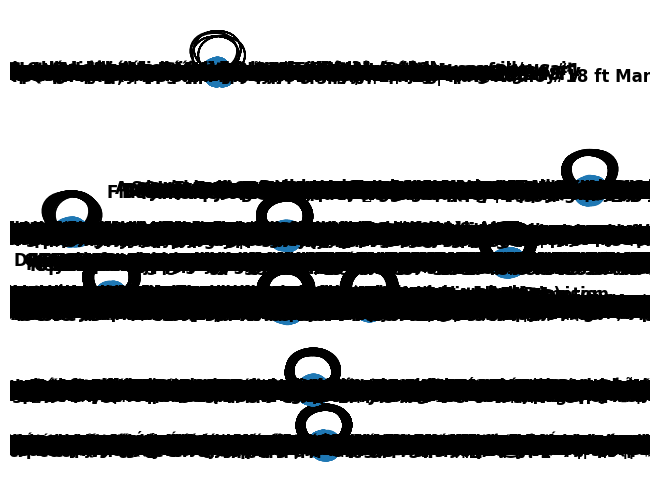

In [133]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un gráfico de relaciones
G = nx.Graph()
for cluster in range(num_clusters):
    cluster_videos = df[df['cluster'] == cluster]
    for index, video in cluster_videos.iterrows():
        G.add_node(video['titulo_video'])
        for neighbor in cluster_videos.iterrows():
            G.add_edge(video['titulo_video'], neighbor[1]['titulo_video'])

# Dibujar el gráfico
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()

In [136]:
import spacy

# Cargar modelo de lenguaje spaCy
# es_core_news_lg
# en_core_web_sm
nlp = spacy.load("en_core_web_lg")

# Crear un knowledge graph
knowledge_graph = {}

for index, row in df.iterrows():
    doc = nlp(row['titulo_video'])
    keywords = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    for keyword in keywords:
        if keyword not in knowledge_graph:
            knowledge_graph[keyword] = set()
        knowledge_graph[keyword].add(row['titulo_video'])

# Imprimir el knowledge graph
for keyword, related_videos in knowledge_graph.items():
    print(f"{keyword}: {related_videos}")

Extracting: {'AMT2 - Extracting Emails from your Gmail Inbox using python'}
email: {'How to Send Emails Using Python - Plain Text, Adding Attachments, HTML Emails, and More', 'Read emails with Python + Gmail API (part 1)', 'AMT2 - Extracting Emails from your Gmail Inbox using python'}
Gmail: {'Read emails with Python + Gmail API (part 1)', 'AMT2 - Extracting Emails from your Gmail Inbox using python'}
Inbox: {'30 Days of Python - Day 9 - Send Email & Read Inbox - Python TUTORIAL', 'AMT2 - Extracting Emails from your Gmail Inbox using python'}
python: {'How I AUTOMATE my FINANCES USING PYTHON', 'Human skeleton openCV python cam2D tracking', 'Digit Recognition using OpenCV, sklearn and Python', 'Time Series Forecasting with XGBoost - Use python and machine learning to predict energy consumption', 'Google Calendar con FastAPI | Python', 'SQL + Python: Master Data Analysis and Create PDF Reports', 'Servidor de archivos con FastAPI | Python', 'Flask python tutorial flask-admin roles and per

In [144]:
print(knowledge_graph.keys())

7790


In [151]:
knowledge_graph['Celery']

{'Advanced Celery',
 'Advanced Celery Tricks - Itamar Hartstein - PyCon Israel 2018',
 'Django Celery Advanced Concepts | How does Celery Work? | Pool, Concurrency, Autoscale |Scaling Apps',
 'Docker Compose | Django | PostgreSQL | Redis & Celery Baseline Configuration',
 'How to Cancel a Running Task in Celery',
 'Implementing Celery, Lessons Learned',
 'PyCharm FastAPI Tutorial Series : Implementing Celery & Redis Configuration - Part 10',
 'Tareas Asíncronas con Celery y RabbitMQ en Django',
 'Task Queues: A Celery Story',
 'Yigit Guler - Understanding Celery & CeleryBeat'}

In [174]:

def detectar_idioma(texto):
    try:
        nlp = spacy.load("xx_ent_wiki_sm")
        doc = nlp(texto)
        idioma = doc._.language["language"]
    except:
        return "No se pudo detectar el idioma"

titulos = [
    "Hello, world!",
    "Bonjour à tous",
    "Hola, cómo estás?",
    "こんにちは、世界！",
    "Привет, мир!",
    "Ciao, mondo!"
]

for titulo in titulos:
    idioma_detectado = detectar_idioma(titulo)
    print(f"Título: '{titulo}' - Idioma detectado: {idioma_detectado}")


Título: 'Hello, world!' - Idioma detectado: No se pudo detectar el idioma
Título: 'Bonjour à tous' - Idioma detectado: No se pudo detectar el idioma
Título: 'Hola, cómo estás?' - Idioma detectado: No se pudo detectar el idioma
Título: 'こんにちは、世界！' - Idioma detectado: No se pudo detectar el idioma
Título: 'Привет, мир!' - Idioma detectado: No se pudo detectar el idioma
Título: 'Ciao, mondo!' - Idioma detectado: No se pudo detectar el idioma


In [173]:
df.assign(lng = lambda x: detectar_idioma(x.titulo_video))

,titulo_video,nombre_canal,keywords,cluster,lng
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"[amt2, extracting, emails, gmail, inbox, using...",1,No se pudo detectar el idioma
1,Read emails with Python + Gmail API (part 1),ian samir,"[read, emails, python, gmail, api, part, 1]",1,No se pudo detectar el idioma
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"[logra, menos, esfuerzo, esencialismo, greg, m...",9,No se pudo detectar el idioma
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto,"[estratégia, trading, chatgpt, 4, code, interp...",9,No se pudo detectar el idioma
4,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance,"[ai, machine, learning, finance, ai, applicati...",5,No se pudo detectar el idioma
...,...,...,...,...,...
3095,Cómo posicionar apps móviles en la Play Store ...,Platzi,"[cómo, posicionar, apps, móviles, play, store,...",6,No se pudo detectar el idioma
3096,SERGIO FAJARDO EN CAFE PICANTE,Cafe Picante Morales,"[sergio, fajardo, cafe, picante]",6,No se pudo detectar el idioma
3097,debate entre Petro y Robledo sobre el mundo de...,Gustavo Petro,"[debate, petro, robledo, mundo, trabajo]",8,No se pudo detectar el idioma
3098,"Al Punto con Gustavo Petro, candidato presiden...",Canal REDMÁSTV,"[punto, gustavo, petro, candidato, presidencial]",5,No se pudo detectar el idioma


In [169]:
df

,titulo_video,nombre_canal,keywords,cluster,lng
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"[amt2, extracting, emails, gmail, inbox, using...",1,No se pudo detectar el idioma
1,Read emails with Python + Gmail API (part 1),ian samir,"[read, emails, python, gmail, api, part, 1]",1,No se pudo detectar el idioma
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"[logra, menos, esfuerzo, esencialismo, greg, m...",9,No se pudo detectar el idioma
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto,"[estratégia, trading, chatgpt, 4, code, interp...",9,No se pudo detectar el idioma
4,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance,"[ai, machine, learning, finance, ai, applicati...",5,No se pudo detectar el idioma
...,...,...,...,...,...
3095,Cómo posicionar apps móviles en la Play Store ...,Platzi,"[cómo, posicionar, apps, móviles, play, store,...",6,No se pudo detectar el idioma
3096,SERGIO FAJARDO EN CAFE PICANTE,Cafe Picante Morales,"[sergio, fajardo, cafe, picante]",6,No se pudo detectar el idioma
3097,debate entre Petro y Robledo sobre el mundo de...,Gustavo Petro,"[debate, petro, robledo, mundo, trabajo]",8,No se pudo detectar el idioma
3098,"Al Punto con Gustavo Petro, candidato presiden...",Canal REDMÁSTV,"[punto, gustavo, petro, candidato, presidencial]",5,No se pudo detectar el idioma
